# New York City 5 Boroughs Crimes Data

Team:  Brian Gaither, Aurian Ghaemmaghami, Drew Larsen and Sabrina Purvis  


# Business Understanding

The selected dataset documents all reported crimes in the 5 boroughs of New York City up to but excluding murder.  We hope to gather insights related to location, probability and crime type classification.  With these findings, we believe we could make recommendations on police training, shift allocations, and jail/prison capacity.  
  
As you will see below and in further lab submissions, we believe we can find meaningful clusters in time of day, day of week, day of month and possibly even season with relation to crime counts and locations.  Additionally, we plan to classify crime types and utilize that variable.
 
We are exploring two specific aims with this dataset:
1. Predict crime volume by day using RMSE to measure model effectiveness with a goal of 5 or better.  
2. Classify crimes by types using Accuracy, Specificity, and Sensitivity to measure model effectiveness better than 60% accuracy.  

Our definition of a successful model is one that is able to provide actionable insights and intel in addition to prediction.  Being able to cluster and classify types of crimes will allow practical application around policing, whereas prediction of crime probability provides suggestions around areas to monitor.

This data has been gathered from https://www.kaggle.com/adamschroeder/crimes-new-york-city.
  





# Data Meaning

Dataset has 1,048,575  observations with 24 variables.  
  
This dataset has a second file provided that provides each of the 5 borough population metrics by decade from 1950 with projections through 2040.


|Variable Label|Variable Type|Data Description|
| :-|:-|:-|
|CMPLNT_NUM|Continuous|Randomly generated persistent ID for each complaint |
|CMPLNT_FR_DT|Datestamp|	Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)|
|CMPLNT_FR_TM|Timestamp|	Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)|
|CMPLNT_TO_DT|Datestamp|	Ending date of occurrence for the reported event, if exact time of occurrence is unknown|
|CMPLNT_TO_TM|Timestamp|	Ending time of occurrence for the reported event, if exact time of occurrence is unknown|
|RPT_DT|Datestamp|	Date event was reported to police |
|KY_CD|Categorical|	Three digit offense classification code|
|OFNS_DESC	|Categorical (string)|Description of offense corresponding with key code|
|PD_CD	|Categorical|Three digit internal classification code (more granular than Key Code)|
|PD_DESC|Categorical (string)|	Description of internal classification corresponding with PD code (more granular than Offense Description)|
|CRM_ATPT_CPTD_CD|Categorical|	Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely|
|LAW_CAT_CD|Categorical|	Level of offense: felony, misdemeanor, violation |
|JURIS_DESC|Categorical|	Jurisdiction responsible for incident. Either internal, like Police, Transit, and Housing; or external, like Correction, Port Authority, etc.|
|BORO_NM	|Categorical|The name of the borough in which the incident occurred|
|ADDR_PCT_CD	|Categorical|The precinct in which the incident occurred|
|LOC_OF_OCCUR_DESC|Categorical|	Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of|
|PREM_TYP_DESC|Categorical|	Specific description of premises; grocery store, residence, street, etc.|
|PARKS_NM	|Categorical|Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included)|
|HADEVELOPT|Categorical|	Name of NYCHA housing development of occurrence, if applicable|
|X_COORD_CD|Continuous|	X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)|
|Y_COORD_CD|Continuous|	Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)|
|Latitude|Continuous|	Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326) |
|Longitude|Continuous|	Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)|


We knew from the initial dataset, we would require exogenous variables, preferably that were continuous.  We selected the following items to include as potential inputs.

#### Weather Data

Weather data was captured from https://www.ncdc.noaa.gov/.  We pulled all weather data from 2010 to 2020 and set the location as Central Park Station.  

While the information available was plentiful, the variables we selected and captured are as described here:

|Variable code|Description|Unit of Measure|
|:-|:-|:-|
|PRCP|Precipitation|Inches|
|SNOW|Snowfall|Inches|
|TMAX|Maximum temperature|Fahrenheit|
|TMIN|Minimum temperature|Fahrenheit|

#### Income Data

The income data was gathered from https://www.baruch.cuny.edu/nycdata/income-taxes/per_cap.htm.  From here, we captured the following information.

|Variable|Description|Unit Of Measure|
|:-|:-|:-|
|Borough Name|Per Capita Income (Per Year)|USD|
  
#### Housing Data

Data on average housing prices was gathered from https://data.cityofnewyork.us/City-Government/DOF-Summary-of-Neighborhood-Sales-by-Neighborhood-/5ebm-myj7.  For this set, we gathered data for 2014 & 2015 and established a low, average, medium and high sale price value per borough.  We next classified the home sale prices in a range of low, medium, high and very high.

#### Population Data

The population data was provided from Kaggle as an input to the overall dataset.  It was provided by borough, based on the census data by decade.  We will use 2010 as our dataset.

|Variable|Description|Unit Of Measure|
|:-|:-|:-|
|Borough Name|Population|Count (Continuous)|

# Data Quality

The data quality of the original raw dataset has been analyzed with key findings outlined below.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
from folium import plugins
import altair as alt
import matplotlib.dates as mdates
from datetime import timedelta
from statsmodels.nonparametric.smoothers_lowess import lowess
from matplotlib.dates import DayLocator, MonthLocator, DateFormatter, drange

#load csv
drew_file_path = '/home/drew/School/Semester4/ML1/NewYorkCityCrimes2015/Data/NYPD_Rollup_Joined_All.csv'
file_path = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Lab1\\Data_NYPD\\Modified_Data_Sets\\FE1_NYPD_Complaint_Data_Historic.csv"
f_path_old = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Lab1\\Data_NYPD\\NYPD_Complaint_Data_Historic.csv"
#load Data into Pandas
df = pd.read_csv(file_path)
#original dataset
df_old = pd.read_csv(f_path_old)

#load csv
drew_filePath = '/home/drew/School/Semester4/ML1/NewYorkCityCrimes2015/Data/NYPD_Rollup_Joined_All.csv'
filePath = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Lab1\\Data_NYPD\\Modified_Data_Sets\\NYPD_Rollup_Joined_All.csv"
#load Data into Pandas
df_Crime = pd.read_csv(filePath)

### Missing Values

Looking at the original raw data, there are several NaNs in the dataframe.  Given most of the data is categorical data, we will not impute these values but rather be selective with the features we include and drop the NaNs. 

We have considered using the mean duration between CMPLNT_FR_TM and CMPLNT_TO_TM to impute the missing CMPLNT_TO_DT and CMPLNT_TP_TM should we determine that doing so will be of value.

The number missing values by column are shown below:

In [2]:
len(df) - df.count()

CMPLNT_NUM                 0
CMPLNT_FR_DT              65
CMPLNT_FR_TM               0
CMPLNT_TO_DT          205959
CMPLNT_TO_TM          205573
RPT_DT                     0
KY_CD                      0
OFNS_DESC               2880
PD_CD                    733
PD_DESC                  733
CRM_ATPT_CPTD_CD           1
LAW_CAT_CD                 0
JURIS_DESC                 0
BORO_NM                    0
ADDR_PCT_CD                1
LOC_OF_OCCUR_DESC     217752
PREM_TYP_DESC           4689
PARKS_NM             1040976
HADEVELOPT            996803
X_COORD_CD             32417
Y_COORD_CD             32417
Latitude               32417
Longitude              32417
Lat_Lon                32417
Start_Dt_Tm               65
End_Dt_Tm             206108
Day_Name                  65
Duration              206159
Duration_to_PD            65
Month                     65
Day                       65
Year                      65
Duration_lbl          257876
Season                    65
Daytime       

### Incorrect Year Entered

We identified 7 records with the incorrect year of 1015 entered instead of 2015.  In this case, we have converted such values to the correct year of 2015.

In [3]:
len(df_old[(df_old['CMPLNT_FR_DT'].notnull())&(df_old['CMPLNT_FR_DT'].str.contains("1015"))])

7

We've determined there are no duplicate records in the raw dataset.  This was checked with the code below.

In [4]:
df_Dupes = df[df.duplicated()]
print(df_Dupes)

Empty DataFrame
Columns: [CMPLNT_NUM, CMPLNT_FR_DT, CMPLNT_FR_TM, CMPLNT_TO_DT, CMPLNT_TO_TM, RPT_DT, KY_CD, OFNS_DESC, PD_CD, PD_DESC, CRM_ATPT_CPTD_CD, LAW_CAT_CD, JURIS_DESC, BORO_NM, ADDR_PCT_CD, LOC_OF_OCCUR_DESC, PREM_TYP_DESC, PARKS_NM, HADEVELOPT, X_COORD_CD, Y_COORD_CD, Latitude, Longitude, Lat_Lon, Start_Dt_Tm, End_Dt_Tm, Day_Name, Duration, Duration_to_PD, Month, Day, Year, Duration_lbl, Season, Daytime, GeoCell, GeoCell_X, GeoCell_Y]
Index: []

[0 rows x 38 columns]


### Outliers

Our crime data is made up of timestamp, categorical and geospacial data and no continuous variables.  As a result, we have no outliers in the raw form of the data.

# Simple Statistics

Looking at the original raw dataset, we can see that 63% of the data is made up of 6 types of crimes:  Petit Larceny, Harrassment 2, Assault 3 & Related Offenses, Criminal Mischief & Related Offenses, Grand Larceny, and Dangerous Drugs.

In [5]:
df.describe(exclude=[np.number])

CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM     RPT_DT  \
count       1048510      1048575       842616       843002    1048575   
unique         2507         1440         1662         1440        804   
top        1/1/2014     12:00:00   10/17/2014     12:00:00  7/23/2015   
freq           2211        27794         1367        14347       1696   

            OFNS_DESC    PD_DESC CRM_ATPT_CPTD_CD   LAW_CAT_CD  \
count         1045695    1047842          1048574      1048575   
unique             68        373                2            3   
top     PETIT LARCENY  ASSAULT 3        COMPLETED  MISDEMEANOR   
freq           180246      93214          1029816       585468   

              JURIS_DESC  ...      PARKS_NM   HADEVELOPT  \
count            1048575  ...          7599        51772   
unique                20  ...           863          268   
top     N.Y. POLICE DEPT  ...  CENTRAL PARK  CASTLE HILL   
freq              930995  ...           543         1106   

                              Lat_Lon       Start_Dt_Tm            End_Dt_Tm  \
count                         1016158           1048510               842467   
unique                          87607            295058               333297   
top     (40.750430768, -73.989282176)  1/1/2014 0:01:00  12/31/2014 23:59:00   
freq                             3178               266                   54   

       Day_Name     Month Duration_lbl   Season  Daytime  
count   1048510   1048510       790699  1048510   998700  
unique        7        12            3        4        6  
top      Friday  November        Short     Fall  Evening  
freq     160325    114936       662929   287723   243485  

[4 rows x 23 columns]

In [6]:
import altair as alt
totalRecords = 1048575
df_crime_prop = df.groupby(['OFNS_DESC']).agg(count_cmplnt=('CMPLNT_NUM','count')).reset_index()
df_crime_prop['percent_of_data'] = df_crime_prop['count_cmplnt']/totalRecords

alt.Chart(df_crime_prop).mark_bar().encode(
  x = alt.Y('OFNS_DESC:N', sort='-y'),
  y='percent_of_data:Q',
  tooltip = ['OFNS_DESC', 'percent_of_data']
).properties(width = 800, height = 300, title="Proportion of Crimes in the Dataset")

alt.Chart(...)

As the original data is mostly timestamp and categorical data with the exception of geopositional data such as longitude and latitude, for instance, we have aggregated the data by day to analyze trends in crime volume by day focusing on the top 6 crimes by volume:  Petit Larceny, Harrassment 2, Assault 3 & Related Offenses, Criminal Mischief & Related Offenses, Grand Larceny, and Dangerous Drugs.

### Boxplots of crime volume per day by different dimensions

Below, we've constructed various boxplots to analyze the volume of daily crimes by New York City borough.  We can see that Manhattan has the highest median daily crime volume at 18.5 crimes per day, whereas Staten Island has the lowest median crimes per day at 4.

In [7]:
#take random samples
size = 100        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_smpl = df_Crime.groupby('BORO_NM', as_index=False).apply(fn).reset_index()

alt.Chart(df_smpl).mark_boxplot().encode(
    x='BORO_NM:N',
    y='count_cmplnt:Q'
).properties(width = 500, height = 300,title="Boxplot of Number of Crimes Per Day by Borough")

alt.Chart(...)

By analyzing the volume of daily crimes by season, we can see that both Spring and Summer have the highest median crime rate per day at 8 crimes per day each.  Fall has a mediam daily crime rate of 5 and Winter has a median daily crime rate of 4 crimes per day.

In [8]:
#take random samples
size = 100        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_smpl = df_Crime.groupby('Season', as_index=False).apply(fn).reset_index()

alt.Chart(df_smpl).mark_boxplot().encode(
    x='Season:N',
    y='count_cmplnt:Q'
).properties(width = 500, height = 300,title="Boxplot of Number of Crimes Per Day by Season")

alt.Chart(...)

Analyzing the daily crime rate by Month reveals that June has the highest median daily crime rate at 12.5 crimes per day.  December has the lowest median daily crime rate at 5 crimes per day.

In [9]:
#take random samples
size = 100        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_smpl = df_Crime.groupby('Month', as_index=False).apply(fn).reset_index()

mySort = ["January","February","March","April","May","June","July","August","September","October","November","December"]
alt.Chart(df_smpl).mark_boxplot().encode(
    x= alt.Y('Month:N',sort=mySort),
    y='count_cmplnt:Q'
).properties(width = 500, height = 300,title="Boxplot of Number of Crimes Per Day by Month")

alt.Chart(...)

Using Start Date/Time and End Date/Time to calculate duration of crime. Using this new "Duration" feature, we've created boxplots to analyze any patterns around duration and different categorical variables.  

Below, we can see that Felony has a larger duration than Misdemeanor and Violation.

Text(0.5, 1.0, 'Boxplot of Duration of Crime by Crime Type')

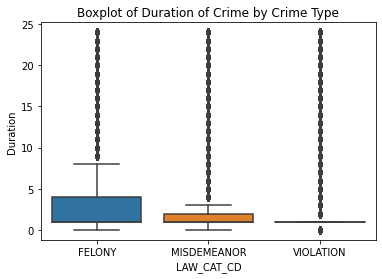

In [10]:
#Duration box plot by crime type
ax = sns.boxplot(x="LAW_CAT_CD", y="Duration", data=df)
ax.set_title("Boxplot of Duration of Crime by Crime Type")

The following boxplot assesses Duration against day time which indicates Morning has a larger spread of duration than other times of day.

Text(0.5, 1.0, 'Boxplot of Duration of Crime by Daytime')

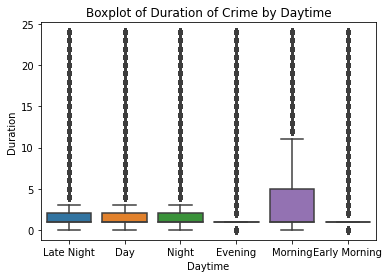

In [11]:
#Duration by time of day
ax = sns.boxplot(x="Daytime", y="Duration", data=df)
ax.set_title("Boxplot of Duration of Crime by Daytime")

Looking at Duration by Borough doesn't reveal a large difference between Boroughs and duration.

Text(0.5, 1.0, 'Boxplot of Duration of Crime by Borough')

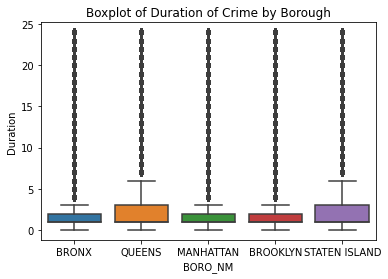

In [12]:
#Duration by Borough
ax = sns.boxplot(x="BORO_NM", y="Duration", data=df)
ax.set_title("Boxplot of Duration of Crime by Borough")

Looking at duration by offense description reveals that certain crimes have a larger median duration.  For instance, Grand Larceny of Motor Vehicle has a median duration of 12 hours compared to other crimes which have a median duration of 1-2 hours.

In [13]:
#take random samples by OFNS_DESC for box plot
size = 25        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_smpl = df.groupby('OFNS_DESC', as_index=False).apply(fn).reset_index()

alt.Chart(df_smpl).mark_boxplot().encode(
    x='OFNS_DESC:N',
    y='Duration:Q'
).properties(title="Boxplot of Duration for each Offense Description")

alt.Chart(...)

# Visualize Attributes

### Crimes per Day

Below is a plot of crimes per day in New York with a LOWESS curve. The purpose of the LOWESS curve is to show the trend of crimes: It looks like crime is higher in the summer months than the winter months, and that tends to be a yearly cycle. We choose to create a scatter plot with a curve over it since there was 760 points of highly noisy data. Another plot would have likely been too noisy, and the curve highlights the overall trend that may be hard to see in the noisy daily crimes data. 

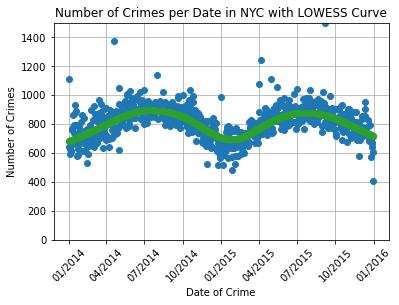

In [14]:
df_Crime['CMPLNT_FR_DT'] = pd.to_datetime(df_Crime['CMPLNT_FR_DT'], format = '%m/%d/%Y')
crimeByDate = df_Crime.groupby('CMPLNT_FR_DT')['count_cmplnt'].sum().reset_index()
fig, ax = plt.subplots()
plt.xlabel('Date of Crime')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.ylim(-5, 1500)
plt.title('Number of Crimes per Date in NYC with LOWESS Curve')
plt.plot_date(crimeByDate['CMPLNT_FR_DT'], crimeByDate['count_cmplnt'])
plt.plot_date(crimeByDate['CMPLNT_FR_DT'],lowess(crimeByDate['count_cmplnt'],crimeByDate['CMPLNT_FR_DT'], frac = .25))
ax.xaxis.set_tick_params(rotation=45, labelsize=10)
ax.xaxis.set_major_formatter(DateFormatter('%m/%Y'))
plt.show()

### Density / Heatmap plots

In [15]:
#Code source: https://medium.com/@madhuramiah/geographic-plotting-with-python-folium-2f235cc167b7

import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
from folium import plugins

%matplotlib inline

First, we have to define the count bins by the various offenses.  We determined in this step that we would only include n>25 but this can be amended to drop the threshold down as we defined the bins down to five. Colors and bin sizes can also be modified.

In [16]:
location=df.groupby(['Latitude','Longitude','OFNS_DESC']).size().reset_index(name='count').sort_values(by='count',ascending=False)

location=location[location['count']>25]

location['color']=location['count'].apply(lambda count:"Black" if count>=400 else
                                         "green" if count>=200 and count<400 else
                                         "Orange" if count>=100 and count<200 else
                                         "darkblue" if count>=50 and count<100 else
                                         "red" if count>=25 and count<50 else
                                         "lightblue" if count>=10 and count<25 else
                                         "brown" if count>=5 and count<10 else
                                         "grey")

location['size']=location['count'].apply(lambda count:12 if count>=400 else
                                         10 if count>=200 and count<400 else
                                         8 if count>=100 and count<200 else
                                         6 if count>=50 and count<100 else
                                         4 if count>=25 and count<50 else
                                         2 if count>=10 and count<25 else
                                         1 if count>=5 and count<10 else
                                         0.1)

location

Latitude  Longitude                       OFNS_DESC  count  color  \
263120  40.750431 -73.989282                   PETIT LARCENY   2467  Black   
307336  40.791152 -73.884372  OFFENSES AGAINST PUBLIC ADMINI   1091  Black   
238373  40.733927 -73.871582                   PETIT LARCENY    997  Black   
203623  40.710094 -74.010610                   PETIT LARCENY    984  Black   
307328  40.791152 -73.884372                  FELONY ASSAULT    926  Black   
...           ...        ...                             ...    ...    ...   
315540  40.804046 -73.936620                   HARRASSMENT 2     26    red   
326036  40.814712 -73.942275                   HARRASSMENT 2     26    red   
40540   40.614782 -74.083046                   HARRASSMENT 2     26    red   
153600  40.685352 -73.919076                   HARRASSMENT 2     26    red   
364326  40.841182 -73.942674                   PETIT LARCENY     26    red   

        size  
263120    12  
307336    12  
238373    12  
203623    12  
307328    12  
...      ...  
315540     4  
326036     4  
40540      4  
153600     4  
364326     4  

[1888 rows x 6 columns]

The heatmap demonstrates concentration of cases.  When removing the casecount filters, the findings are that crimes happen everywhere.  We narrowed focus to counts greater than 25 to assess high crime volume.  Manhattan across the board has high crime rates, as does Riker's Island (home of the local prison), and Bay Plaza (a shopping complex).

The first plot below has the various crimes color coded and the locations they occurred.

In [17]:
#we have to define the center of the map first, to base the map from
m=folium.Map([40.738, -73.98],zoom_start=11)

#location=location[0:2000]

for lat,lon,area,color,count,size in zip(location['Latitude'],location['Longitude'],location['OFNS_DESC'],location['color'],
                                         location['count'],location['size']):

     folium.CircleMarker([lat, lon],
                            popup=area,
                            radius=size,
                            color='b',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color=color,
                           ).add_to(m)

#Map is saved to file
m.save('Crime_Map.html')
m

In the following plot, we add a heatmap element to the map to show density.

In [18]:
location1=location[0:1326]
location_data = location[['Latitude', 'Longitude']]

# plot heatmap

m.add_child(plugins.HeatMap(location_data, radius=15))
m.save('heatmap.html')
m

# Explore Joint Attributes

Here we look at potential interactions between the attributes that we will use as predictors. The first 5 lines of our df_Crime dataframe are below. 

In [19]:
df_Crime['CMPLNT_FR_DT'] = pd.to_datetime(df_Crime['CMPLNT_FR_DT'], format = '%m/%d/%Y')
df_Crime['dowNo'] = df_Crime['CMPLNT_FR_DT'].dt.dayofweek
df_Crime['MonthNo'] = df_Crime['CMPLNT_FR_DT'].dt.month
df_Crime.head()

CMPLNT_FR_DT Daytime   Day_Name    Month  Day  Year  Season  GeoCell  \
0   2014-01-01     Day  Wednesday  January    1  2014  Winter       16   
1   2014-01-01     Day  Wednesday  January    1  2014  Winter       25   
2   2014-01-01     Day  Wednesday  January    1  2014  Winter       26   
3   2014-01-01     Day  Wednesday  January    1  2014  Winter       34   
4   2014-01-01     Day  Wednesday  January    1  2014  Winter       35   

    BORO_NM  count_cmplnt  ...  TMAX  Population  PC_INCOME  \
0  BROOKLYN             3  ...    33     2552911      41399   
1  BROOKLYN             3  ...    33     2552911      41399   
2  BROOKLYN             1  ...    33     2552911      41399   
3  BROOKLYN             1  ...    33     2552911      41399   
4  BROOKLYN             6  ...    33     2552911      41399   

   Hm_Sls_Price_Range         Holiday               Event is_Holiday is_Event  \
0                High  New Year's Day  New York Boat Show          1        1   
1                High  New Year's Day  New York Boat Show          1        1   
2                High  New Year's Day  New York Boat Show          1        1   
3                High  New Year's Day  New York Boat Show          1        1   
4                High  New Year's Day  New York Boat Show          1        1   

  dowNo  MonthNo  
0     2        1  
1     2        1  
2     2        1  
3     2        1  
4     2        1  

[5 rows x 23 columns]

Below, we have created a correlation matrix for each of the variables in the dataset.

In [20]:
df_Crime.corr()

Day      Year   GeoCell  count_cmplnt      PRCP      SNOW  \
Day           1.000000 -0.001421 -0.000848     -0.007576  0.012544 -0.046699   
Year         -0.001421  1.000000  0.001843     -0.008271 -0.047433  0.000461   
GeoCell      -0.000848  0.001843  1.000000      0.207204  0.003238  0.005115   
count_cmplnt -0.007576 -0.008271  0.207204      1.000000 -0.014244 -0.022483   
PRCP          0.012544 -0.047433  0.003238     -0.014244  1.000000  0.224347   
SNOW         -0.046699  0.000461  0.005115     -0.022483  0.224347  1.000000   
TMIN         -0.007068  0.058991 -0.013898      0.048322  0.001449 -0.237716   
TMAX          0.005549  0.071651 -0.013775      0.048576 -0.027876 -0.234150   
Population    0.000042  0.000651 -0.083335      0.036291  0.002441  0.002379   
PC_INCOME    -0.000033  0.034611  0.173201      0.239914 -0.001085  0.003053   
is_Holiday   -0.031176 -0.002956 -0.000401     -0.007963 -0.052351 -0.025207   
is_Event     -0.052619 -0.003002  0.000930     -0.001994 -0.049207 -0.008235   
dowNo         0.013214  0.001330  0.000675     -0.009698 -0.042888 -0.037923   
MonthNo       0.002521  0.006576 -0.003141      0.010708 -0.003824 -0.206128   

                  TMIN      TMAX  Population  PC_INCOME  is_Holiday  is_Event  \
Day          -0.007068  0.005549    0.000042  -0.000033   -0.031176 -0.052619   
Year          0.058991  0.071651    0.000651   0.034611   -0.002956 -0.003002   
GeoCell      -0.013898 -0.013775   -0.083335   0.173201   -0.000401  0.000930   
count_cmplnt  0.048322  0.048576    0.036291   0.239914   -0.007963 -0.001994   
PRCP          0.001449 -0.027876    0.002441  -0.001085   -0.052351 -0.049207   
SNOW         -0.237716 -0.234150    0.002379   0.003053   -0.025207 -0.008235   
TMIN          1.000000  0.966770   -0.004587  -0.005320   -0.025205  0.073556   
TMAX          0.966770  1.000000   -0.004343  -0.005235   -0.027139  0.086977   
Population   -0.004587 -0.004343    1.000000  -0.193358    0.004260  0.001368   
PC_INCOME    -0.005320 -0.005235   -0.193358   1.000000   -0.001534 -0.001561   
is_Holiday   -0.025205 -0.027139    0.004260  -0.001534    1.000000  0.195461   
is_Event      0.073556  0.086977    0.001368  -0.001561    0.195461  1.000000   
dowNo        -0.026017 -0.030658    0.002820  -0.001557   -0.091779  0.033036   
MonthNo       0.440380  0.369026   -0.001405  -0.002640   -0.037746 -0.046510   

                 dowNo   MonthNo  
Day           0.013214  0.002521  
Year          0.001330  0.006576  
GeoCell       0.000675 -0.003141  
count_cmplnt -0.009698  0.010708  
PRCP         -0.042888 -0.003824  
SNOW         -0.037923 -0.206128  
TMIN         -0.026017  0.440380  
TMAX         -0.030658  0.369026  
Population    0.002820 -0.001405  
PC_INCOME    -0.001557 -0.002640  
is_Holiday   -0.091779 -0.037746  
is_Event      0.033036 -0.046510  
dowNo         1.000000 -0.015484  
MonthNo      -0.015484  1.000000

Below, we've created a dataframe grouped by day and borough.  The first five lines of this grouped dataframe are shown. Since we are taking the maximum value per day per borough, things that don't change in a day like weather, information about the day, and information about the borough will not change. What will change is the GeoCell and count_complaint. Since count_cmplnt is the target variable, we weren't going to look at it for this analysis. Aside from borough, GeoCell doesn't appear to have an interaction with any other variable. We will look at borough and GeoCell at the end of this analysis. 

See the first 5 rows of the grouped dataframe below. 

In [21]:
gpByDay = df_Crime.groupby(['CMPLNT_FR_DT', 'BORO_NM']).max()
gpByDay = gpByDay.drop(['GeoCell', 'count_cmplnt'], axis = 1)
gpByDay.head()

Daytime   Day_Name    Month  Day  Year  Season  \
CMPLNT_FR_DT BORO_NM                                                        
2014-01-01   BRONX           Night  Wednesday  January    1  2014  Winter   
             BROOKLYN        Night  Wednesday  January    1  2014  Winter   
             MANHATTAN       Night  Wednesday  January    1  2014  Winter   
             QUEENS          Night  Wednesday  January    1  2014  Winter   
             STATEN ISLAND   Night  Wednesday  January    1  2014  Winter   

                            PRCP  SNOW  TMIN  TMAX  Population  PC_INCOME  \
CMPLNT_FR_DT BORO_NM                                                        
2014-01-01   BRONX           0.0   0.0    24    33     1385108      31556   
             BROOKLYN        0.0   0.0    24    33     2552911      41399   
             MANHATTAN       0.0   0.0    24    33     1585873     152690   
             QUEENS          0.0   0.0    24    33     2250002      40997   
             STATEN ISLAND   0.0   0.0    24    33      468730      48123   

                           Hm_Sls_Price_Range         Holiday  \
CMPLNT_FR_DT BORO_NM                                            
2014-01-01   BRONX                        Low  New Year's Day   
             BROOKLYN                    High  New Year's Day   
             MANHATTAN              Very High  New Year's Day   
             QUEENS                    Medium  New Year's Day   
             STATEN ISLAND                Low  New Year's Day   

                                         Event  is_Holiday  is_Event  dowNo  \
CMPLNT_FR_DT BORO_NM                                                          
2014-01-01   BRONX          New York Boat Show           1         1      2   
             BROOKLYN       New York Boat Show           1         1      2   
             MANHATTAN      New York Boat Show           1         1      2   
             QUEENS         New York Boat Show           1         1      2   
             STATEN ISLAND  New York Boat Show           1         1      2   

                            MonthNo  
CMPLNT_FR_DT BORO_NM                 
2014-01-01   BRONX                1  
             BROOKLYN             1  
             MANHATTAN            1  
             QUEENS               1  
             STATEN ISLAND        1

Below is a matrix of the correlations in the numeric data. A few variables have notably high correlations: PRCP and SNOW, MonthNo and SNOW, Temperature and MonthNo, and TMIN and TMAX. The correlations seem to be concentrated on the weather variables and the time of the year.

In [22]:
gpByDay = gpByDay.reset_index()
gpByDay.corr()

Day          Year          PRCP          SNOW  \
Day         1.000000e+00  9.958924e-19  9.082677e-03 -4.777581e-02   
Year        9.958924e-19  1.000000e+00 -4.739439e-02 -1.444116e-03   
PRCP        9.082677e-03 -4.739439e-02  1.000000e+00  2.328464e-01   
SNOW       -4.777581e-02 -1.444116e-03  2.328464e-01  1.000000e+00   
TMIN       -4.038604e-03  5.603890e-02  3.226524e-03 -2.406834e-01   
TMAX        7.128012e-03  6.842028e-02 -2.693452e-02 -2.372240e-01   
Population  8.295681e-18  0.000000e+00  1.184951e-17 -1.258475e-18   
PC_INCOME  -4.498346e-18  2.993769e-02 -1.418879e-03 -4.323350e-05   
is_Holiday  2.038692e-03  1.703958e-18 -4.950254e-02 -2.528305e-02   
is_Event   -4.216052e-02  8.081107e-17 -5.540174e-02 -4.963741e-03   
dowNo       4.032126e-03  6.857541e-04 -4.752569e-02 -4.254354e-02   
MonthNo     1.189318e-02  1.312719e-17 -3.395081e-03 -2.115770e-01   

                    TMIN          TMAX    Population     PC_INCOME  \
Day        -4.038604e-03  7.128012e-03  8.295681e-18 -4.498346e-18   
Year        5.603890e-02  6.842028e-02  0.000000e+00  2.993769e-02   
PRCP        3.226524e-03 -2.693452e-02  1.184951e-17 -1.418879e-03   
SNOW       -2.406834e-01 -2.372240e-01 -1.258475e-18 -4.323350e-05   
TMIN        1.000000e+00  9.669801e-01 -3.098848e-18  1.677675e-03   
TMAX        9.669801e-01  1.000000e+00 -1.674000e-18  2.048345e-03   
Population -3.098848e-18 -1.674000e-18  1.000000e+00 -7.855390e-02   
PC_INCOME   1.677675e-03  2.048345e-03 -7.855390e-02  1.000000e+00   
is_Holiday -5.134469e-02 -5.350157e-02 -2.721720e-18 -4.894819e-18   
is_Event    6.847032e-02  7.911559e-02  1.157595e-17 -8.579423e-18   
dowNo      -1.422155e-02 -2.059385e-02  4.381959e-20  2.052989e-05   
MonthNo     4.480041e-01  3.774488e-01  1.017507e-19 -7.505497e-17   

              is_Holiday      is_Event         dowNo       MonthNo  
Day         2.038692e-03 -4.216052e-02  4.032126e-03  1.189318e-02  
Year        1.703958e-18  8.081107e-17  6.857541e-04  1.312719e-17  
PRCP       -4.950254e-02 -5.540174e-02 -4.752569e-02 -3.395081e-03  
SNOW       -2.528305e-02 -4.963741e-03 -4.254354e-02 -2.115770e-01  
TMIN       -5.134469e-02  6.847032e-02 -1.422155e-02  4.480041e-01  
TMAX       -5.350157e-02  7.911559e-02 -2.059385e-02  3.774488e-01  
Population -2.721720e-18  1.157595e-17  4.381959e-20  1.017507e-19  
PC_INCOME  -4.894819e-18 -8.579423e-18  2.052989e-05 -7.505497e-17  
is_Holiday  1.000000e+00  1.601219e-01 -6.622040e-02 -4.731585e-02  
is_Event    1.601219e-01  1.000000e+00  3.337250e-02 -4.370969e-02  
dowNo      -6.622040e-02  3.337250e-02  1.000000e+00 -8.646677e-03  
MonthNo    -4.731585e-02 -4.370969e-02 -8.646677e-03  1.000000e+00

Here, we look at a pairs plot of the variables in the grouped dataframe. This plot was created to look at whether there are some interesting non-linear trends. There isn't a lot to see as far as interactions here, but the few that do seem to have interactions will be looked at in more detail. 

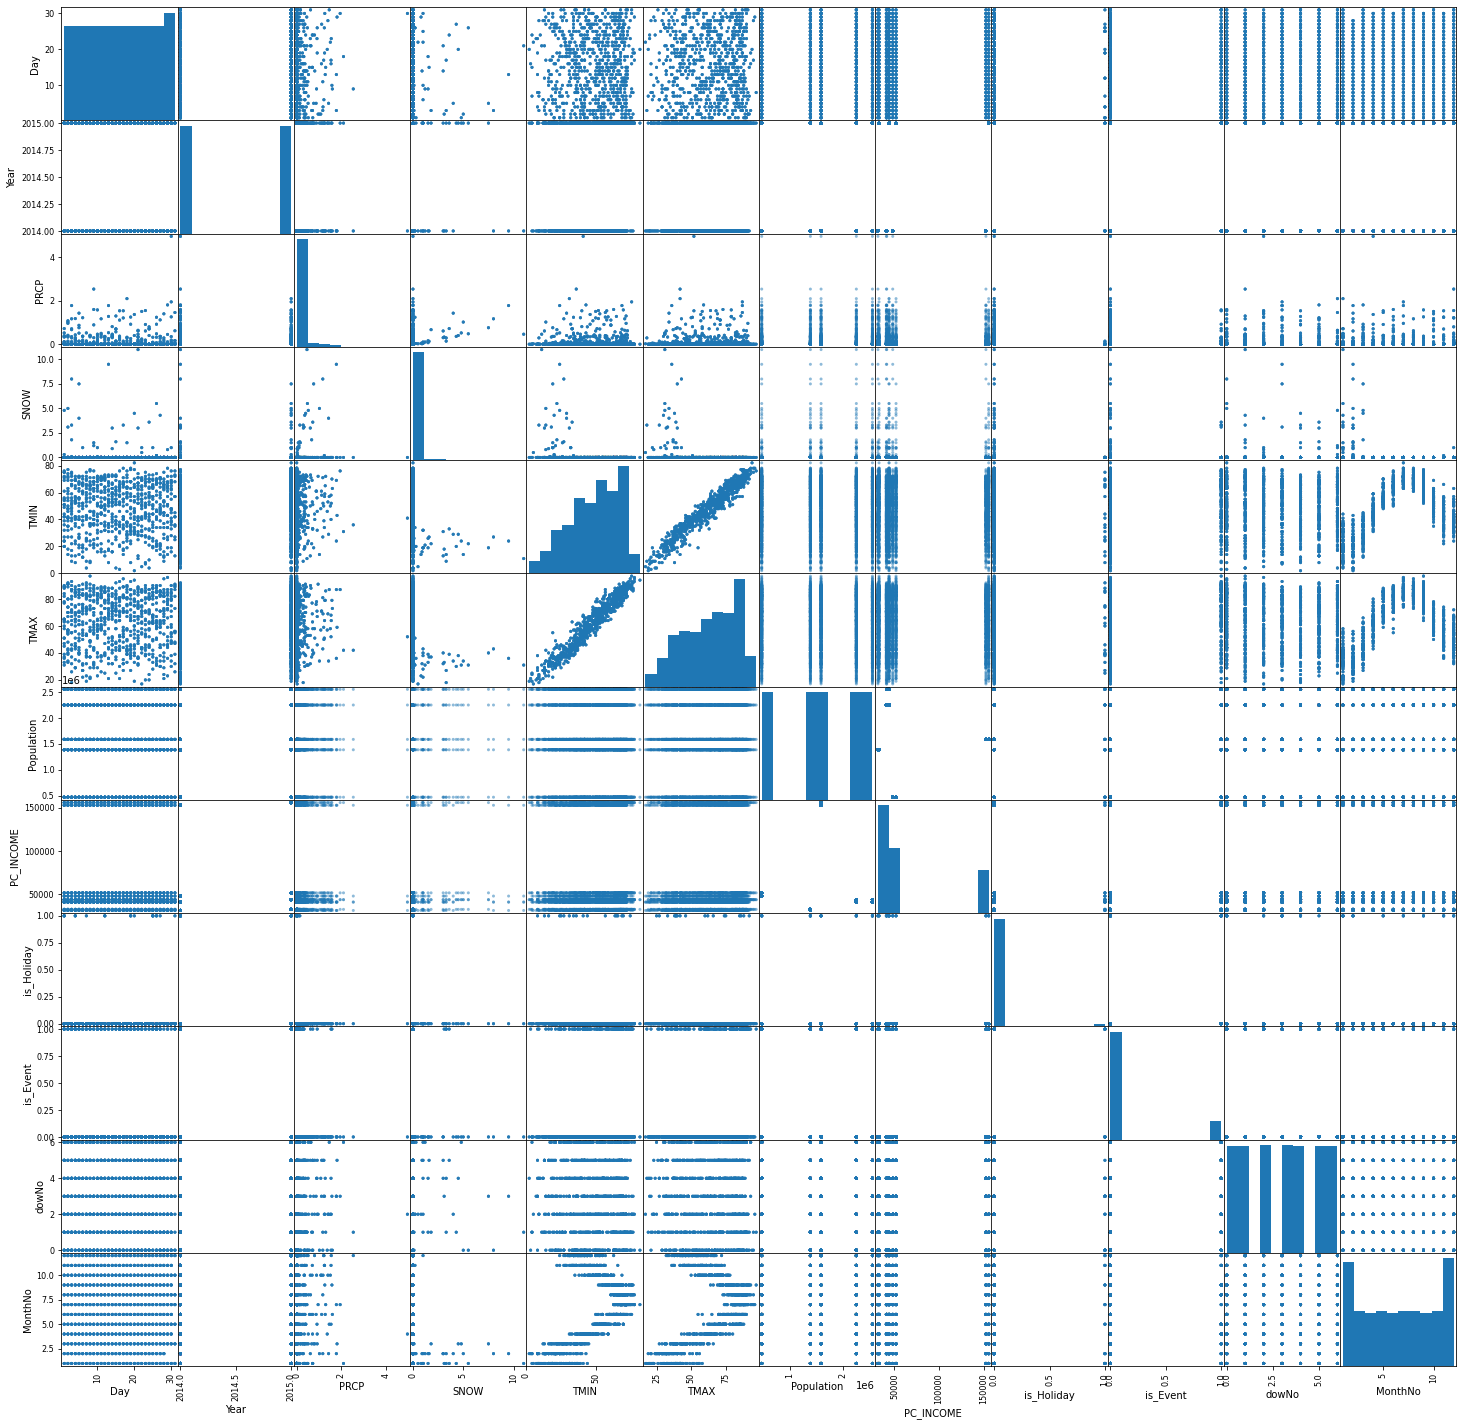

In [23]:
axes = pd.plotting.scatter_matrix(gpByDay, figsize = (25,25));


The weather variables seem to have interactions. We start with TMIN and TMAX, which are the minimum and maximum daily temperatures, respectively. They are heavily correlated with each other, and it makes sense to only use one or the other to predict our target variable. A scatter plot was chosen since we are looking at two numeric variables and a line plot would have been too noisy. 

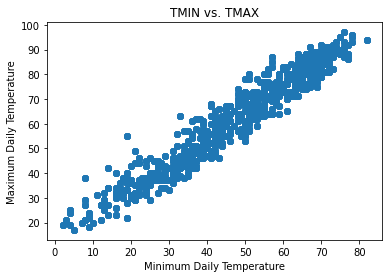

In [24]:
fig, ax = plt.subplots()
plt.xlabel('Minimum Daily Temperature')
plt.ylabel('Maximum Daily Temperature')
plt.title('TMIN vs. TMAX')
plt.scatter(gpByDay['TMIN'], gpByDay['TMAX']);

Removing days without snow, there seems to be a correlation between the PRCP variable and the SNOW variable. A scatter plot was chosen since we are looking at two numeric variables and a line plot would have been too noisy. 

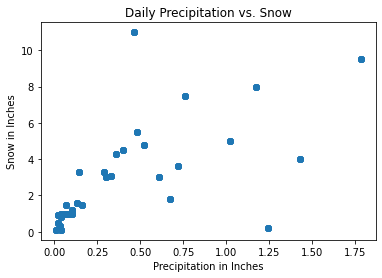

In [25]:
fig, ax = plt.subplots()
plt.xlabel('Precipitation in Inches')
plt.ylabel('Snow in Inches')
plt.title('Daily Precipitation vs. Snow')
raindf = gpByDay[gpByDay['SNOW'] > 0]
plt.scatter(raindf['PRCP'], raindf['SNOW']);

There doesn't seem to be any meaningful correlation between daily max temperature and precipitation. Note that there seems to be very few days with much precipitation when max temperature is less than 25 degrees. A scatter plot was chosen since we are looking at two numeric variables and a line plot would have been too noisy. 

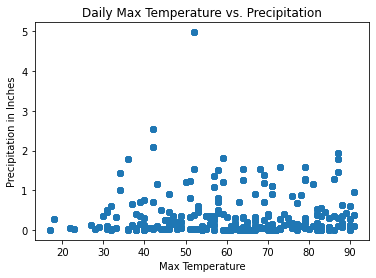

In [26]:
fig, ax = plt.subplots()
plt.xlabel('Max Temperature')
plt.ylabel('Precipitation in Inches')
plt.title('Daily Max Temperature vs. Precipitation')
raindf = gpByDay[gpByDay['PRCP'] > 0]
plt.scatter(raindf['TMAX'], raindf['PRCP']);

There is an interaction between daily maximum temperature and the month, which is expected. Winter months should have a lower temperature than summer months. A bar plot was chosen since we are looking at the average of a numeric variable over levels of a categorical variable. 

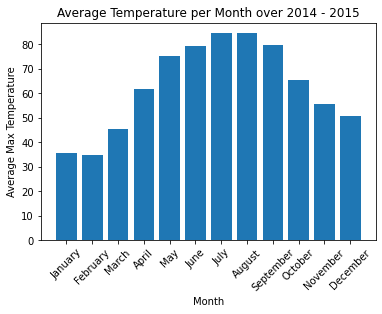

In [27]:
fig, ax = plt.subplots()
plt.xlabel('Month')
plt.ylabel('Average Max Temperature')
plt.title('Average Temperature per Month over 2014 - 2015')
plt.xticks(np.arange(1,13),['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']);
ax.xaxis.set_tick_params(rotation=45, labelsize=10)
tempByMo = gpByDay.groupby('MonthNo').mean().reset_index()
plt.bar(tempByMo['MonthNo'], tempByMo['TMAX']);

There does seem to be an interaction between precipitation and the month. A bar plot was chosen since we are looking at the average of a numeric variable over levels of a categorical variable. 

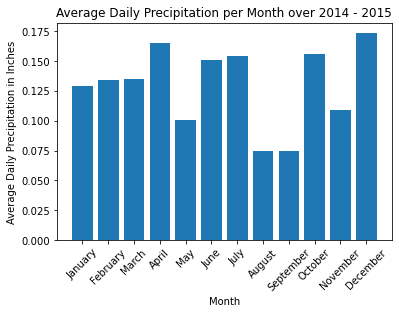

In [28]:
fig, ax = plt.subplots()
plt.xlabel('Month')
plt.ylabel('Average Daily Precipitation in Inches')
plt.title('Average Daily Precipitation per Month over 2014 - 2015')
plt.xticks(np.arange(1,13),['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']);
ax.xaxis.set_tick_params(rotation=45, labelsize=10)
plt.bar(tempByMo['MonthNo'], tempByMo['PRCP']);

There is an interaction with daily snow and month. The snowiest month in New York seems to be February, while April through December get little to no snow. A bar plot was chosen since we are looking at the average of a numeric variable over levels of a categorical variable. 

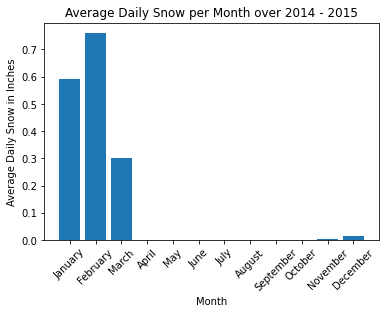

In [29]:
fig, ax = plt.subplots()
plt.xlabel('Month')
plt.ylabel('Average Daily Snow in Inches')
plt.title('Average Daily Snow per Month over 2014 - 2015')
plt.xticks(np.arange(1,13),['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']);
ax.xaxis.set_tick_params(rotation=45, labelsize=10)
plt.bar(tempByMo['MonthNo'], tempByMo['SNOW']);

Here is some demographic data for the different boroughs of New York. It seems that Manhattan has a significantly higher average income than the other 4 boroughs, and has the highest home sales price range. The largest boroughs by population are Brooklyn and Queens. Staten Island has by far the lowest population. A table was chosen since those 3 variables are constant for each borough across every date in the data. 

In [30]:
gpByDay[['BORO_NM', 'Population', 'PC_INCOME', 'Hm_Sls_Price_Range']].head()

BORO_NM  Population  PC_INCOME Hm_Sls_Price_Range
0          BRONX     1385108      31556                Low
1       BROOKLYN     2552911      41399               High
2      MANHATTAN     1585873     152690          Very High
3         QUEENS     2250002      40997             Medium
4  STATEN ISLAND      468730      48123                Low

Below is a table of interactions between the holiday and events in New York. There are 615 days with no holidays or events, 97 days with events but no holidays, 9 days with holidays and no events, and 9 days with both holidays and events. A True/False table was chosen to show the interaction between holidays and events as this is the most effective way to know exactly how many days have no holidays nor events, have holidays but no events, have events but no holidays and have events and holidays.

In [31]:
eventdf = gpByDay.groupby('CMPLNT_FR_DT').max().reset_index()[['is_Holiday', 'is_Event']]
pd.DataFrame({'isHoliday':[len(np.where((eventdf['is_Holiday'] == 0) & (eventdf['is_Event'] == 0))[0]),
              len(np.where((eventdf['is_Holiday'] == 1) & (eventdf['is_Event'] == 0))[0])],
              'isEvent':[len(np.where((eventdf['is_Holiday'] == 0) & (eventdf['is_Event'] == 1))[0]),
                         len(np.where((eventdf['is_Holiday'] == 1) & (eventdf['is_Event'] == 1))[0]),]

})

isHoliday  isEvent
0        615       97
1          9        9

# Explore Attributes and Class

The first five lines of our grouped dataframe are below. We are trying to predict the count_cmplnt variable, which is the amount of crimes per date, time, and geo location. We have decided to explore how each variable in this dataframe impacts the count_cmplnt variable. 

In [32]:
df_Crime.head()

CMPLNT_FR_DT Daytime   Day_Name    Month  Day  Year  Season  GeoCell  \
0   2014-01-01     Day  Wednesday  January    1  2014  Winter       16   
1   2014-01-01     Day  Wednesday  January    1  2014  Winter       25   
2   2014-01-01     Day  Wednesday  January    1  2014  Winter       26   
3   2014-01-01     Day  Wednesday  January    1  2014  Winter       34   
4   2014-01-01     Day  Wednesday  January    1  2014  Winter       35   

    BORO_NM  count_cmplnt  ...  TMAX  Population  PC_INCOME  \
0  BROOKLYN             3  ...    33     2552911      41399   
1  BROOKLYN             3  ...    33     2552911      41399   
2  BROOKLYN             1  ...    33     2552911      41399   
3  BROOKLYN             1  ...    33     2552911      41399   
4  BROOKLYN             6  ...    33     2552911      41399   

   Hm_Sls_Price_Range         Holiday               Event is_Holiday is_Event  \
0                High  New Year's Day  New York Boat Show          1        1   
1                High  New Year's Day  New York Boat Show          1        1   
2                High  New Year's Day  New York Boat Show          1        1   
3                High  New Year's Day  New York Boat Show          1        1   
4                High  New Year's Day  New York Boat Show          1        1   

  dowNo  MonthNo  
0     2        1  
1     2        1  
2     2        1  
3     2        1  
4     2        1  

[5 rows x 23 columns]

Looking at the count_cmplnt column specifically, it looks like the PC_INCOME and GeoCell variables have the greatest correlation. The other variables don't have a large correlation with count_complaint, but we will continue our analysis to see how the variables may affect count_cmplnt as correlation isn't everything. 

In [33]:
df_Crime.corr()

Day      Year   GeoCell  count_cmplnt      PRCP      SNOW  \
Day           1.000000 -0.001421 -0.000848     -0.007576  0.012544 -0.046699   
Year         -0.001421  1.000000  0.001843     -0.008271 -0.047433  0.000461   
GeoCell      -0.000848  0.001843  1.000000      0.207204  0.003238  0.005115   
count_cmplnt -0.007576 -0.008271  0.207204      1.000000 -0.014244 -0.022483   
PRCP          0.012544 -0.047433  0.003238     -0.014244  1.000000  0.224347   
SNOW         -0.046699  0.000461  0.005115     -0.022483  0.224347  1.000000   
TMIN         -0.007068  0.058991 -0.013898      0.048322  0.001449 -0.237716   
TMAX          0.005549  0.071651 -0.013775      0.048576 -0.027876 -0.234150   
Population    0.000042  0.000651 -0.083335      0.036291  0.002441  0.002379   
PC_INCOME    -0.000033  0.034611  0.173201      0.239914 -0.001085  0.003053   
is_Holiday   -0.031176 -0.002956 -0.000401     -0.007963 -0.052351 -0.025207   
is_Event     -0.052619 -0.003002  0.000930     -0.001994 -0.049207 -0.008235   
dowNo         0.013214  0.001330  0.000675     -0.009698 -0.042888 -0.037923   
MonthNo       0.002521  0.006576 -0.003141      0.010708 -0.003824 -0.206128   

                  TMIN      TMAX  Population  PC_INCOME  is_Holiday  is_Event  \
Day          -0.007068  0.005549    0.000042  -0.000033   -0.031176 -0.052619   
Year          0.058991  0.071651    0.000651   0.034611   -0.002956 -0.003002   
GeoCell      -0.013898 -0.013775   -0.083335   0.173201   -0.000401  0.000930   
count_cmplnt  0.048322  0.048576    0.036291   0.239914   -0.007963 -0.001994   
PRCP          0.001449 -0.027876    0.002441  -0.001085   -0.052351 -0.049207   
SNOW         -0.237716 -0.234150    0.002379   0.003053   -0.025207 -0.008235   
TMIN          1.000000  0.966770   -0.004587  -0.005320   -0.025205  0.073556   
TMAX          0.966770  1.000000   -0.004343  -0.005235   -0.027139  0.086977   
Population   -0.004587 -0.004343    1.000000  -0.193358    0.004260  0.001368   
PC_INCOME    -0.005320 -0.005235   -0.193358   1.000000   -0.001534 -0.001561   
is_Holiday   -0.025205 -0.027139    0.004260  -0.001534    1.000000  0.195461   
is_Event      0.073556  0.086977    0.001368  -0.001561    0.195461  1.000000   
dowNo        -0.026017 -0.030658    0.002820  -0.001557   -0.091779  0.033036   
MonthNo       0.440380  0.369026   -0.001405  -0.002640   -0.037746 -0.046510   

                 dowNo   MonthNo  
Day           0.013214  0.002521  
Year          0.001330  0.006576  
GeoCell       0.000675 -0.003141  
count_cmplnt -0.009698  0.010708  
PRCP         -0.042888 -0.003824  
SNOW         -0.037923 -0.206128  
TMIN         -0.026017  0.440380  
TMAX         -0.030658  0.369026  
Population    0.002820 -0.001405  
PC_INCOME    -0.001557 -0.002640  
is_Holiday   -0.091779 -0.037746  
is_Event      0.033036 -0.046510  
dowNo         1.000000 -0.015484  
MonthNo      -0.015484  1.000000

Below is a graph of the total crimes per day of the week over 2014 - 2015. The most crimes occur on Friday, and the fewest crimes occur on Sunday. There isn't a large difference between the individual days of the week, but there may be enough difference between Friday and Sunday to have an impact on our models. A bar plot was chosen since we were interested in looking at the total number of crimes across levels of a categorical variable. 

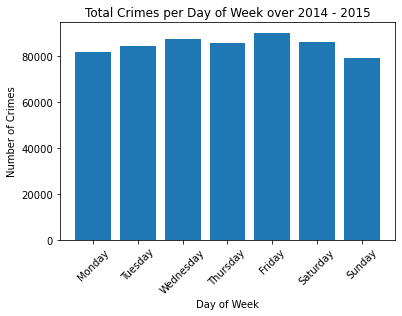

In [34]:
dowdf = df_Crime.groupby('dowNo')['count_cmplnt'].sum().reset_index()
fig, ax = plt.subplots()
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes per Day of Week over 2014 - 2015')
plt.bar(dowdf['dowNo'], dowdf['count_cmplnt']);
ax.xaxis.set_tick_params(rotation=45, labelsize=10)
plt.xticks(np.arange(7),['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

The month seems to have a large impact on the crime count. February has the lowest crime count of all months. This is not normalized for the amount of days in the month, but winter months, regardless of the amount of days, typically have less crime than summer months. The month with the highest amount of crime is July with 55,610 crimes committed over 2 years, but August isn't far behind with 55,251 crimes committed over 2 years. A bar plot was chosen since we were interested in looking at the total number of crimes across levels of a categorical variable. 

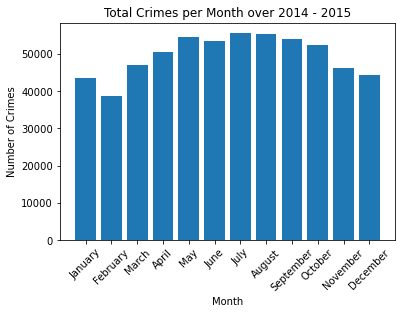

In [35]:
modf = df_Crime.groupby('MonthNo')['count_cmplnt'].sum().reset_index()
fig, ax = plt.subplots()
plt.bar(modf['MonthNo'], modf['count_cmplnt'])
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes per Month over 2014 - 2015')
plt.xticks(np.arange(1,13),['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']);
ax.xaxis.set_tick_params(rotation=45, labelsize=10)
plt.show()

There seem to be a much smaller amount of crimes in Staten Island than the other four New York boroughs. Brooklyn had the most total crimes between 2014 - 2015. Crime is more likely to happen in a high population area, so we decided to normalize these numbers by population. A bar plot was chosen since we were interested in looking at the total number of crimes across levels of a categorical variable. 

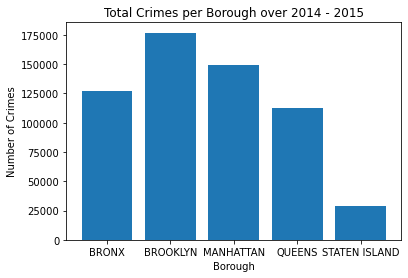

In [36]:
borodf = df_Crime.groupby('BORO_NM')['count_cmplnt'].sum().reset_index()
fig, ax = plt.subplots()
plt.xlabel('Borough')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes per Borough over 2014 - 2015')
plt.bar(borodf['BORO_NM'], borodf['count_cmplnt']);

When we normalize the number of crimes by population, Queens has the lowest number of crimes and Manhattan has the highest number of crimes. Staten Island had a low total number of crimes, but a medium number of crimes per population. A bar plot was chosen since we were interested in looking at the number of crimes per person across levels of a categorical variable. 

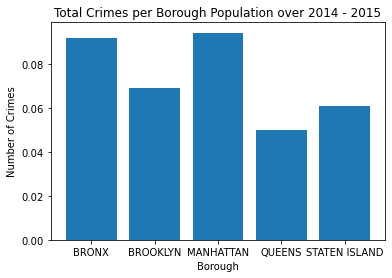

In [38]:
popdf = df_Crime.groupby('BORO_NM')['Population'].max()
boropopdf = borodf.join(popdf, on = 'BORO_NM')
#boropopdf['Population'] = boropopdf['Population'].str.replace(',','').astype(int)
boropopdf['Cmplnt_Pop'] = boropopdf['count_cmplnt'] / boropopdf['Population']
fig, ax = plt.subplots()
plt.xlabel('Borough')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes per Borough Population over 2014 - 2015')
plt.bar(boropopdf['BORO_NM'], boropopdf['Cmplnt_Pop']);

In order to bring the latitude and longitude into the grouped analysis, we created 100 GeoCells to bin the locations of crimes. When we plot the number of crimes by location, we find a large difference between the 100 geocells. GeoCell number 87 has a two year crime count of 48,434, while many of these GeoCells have no crime at all. Crime count has a large dependence on location. A bar plot was chosen since we were interested in looking at the total number of crimes across levels of a categorical variable. 

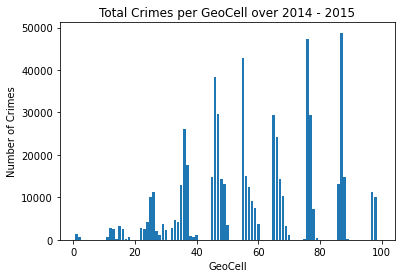

In [39]:
locdf = df_Crime.groupby('GeoCell')['count_cmplnt'].sum().reset_index()
fig, ax = plt.subplots()
plt.xlabel('GeoCell')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes per GeoCell over 2014 - 2015')
plt.bar(locdf['GeoCell'], locdf['count_cmplnt']);

Average Home Sale Price also seems to have a large impact on the number of crimes committed. We binned average home sale price into low, medium, high and very high. The high and low sale price areas seem to have the highest amount of crime, while the medium home sale price areas seem to have the lowest crime count. A bar plot was chosen since we were interested in looking at the total number of crimes across levels of a categorical variable. 

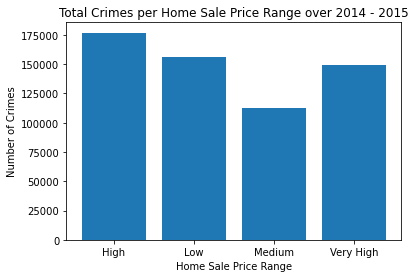

In [40]:
moneydf = df_Crime.groupby('Hm_Sls_Price_Range')['count_cmplnt'].sum().reset_index()
fig, ax = plt.subplots()
plt.xlabel('Home Sale Price Range')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes per Home Sale Price Range over 2014 - 2015')
plt.bar(moneydf['Hm_Sls_Price_Range'], moneydf['count_cmplnt']);

When we look at the number of crimes per day vs. the daily high temperature, we can see that crime seems to increase lineraly as temperature increases. This seems to confirm what we saw in the plot of crimes per month: the colder winter months have lower amounts of crime, while the warmer summer months have larger amounts of crime. A scatter plot was chosen since we are looking at two numeric variables and a line plot would have been too noisy. 

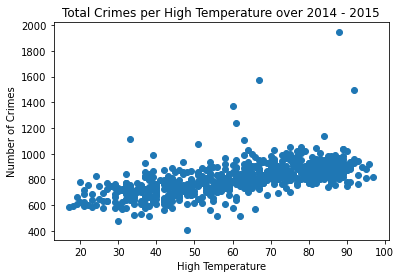

In [41]:
datedf = df_Crime.groupby('CMPLNT_FR_DT')['count_cmplnt'].sum().reset_index()
temp_df = df_Crime.groupby('CMPLNT_FR_DT')['TMAX','TMIN', 'SNOW', 'PRCP'].max();
tempdf = datedf.join(temp_df, on = 'CMPLNT_FR_DT')
fig, ax = plt.subplots()
plt.scatter(tempdf['TMAX'], tempdf['count_cmplnt']);
plt.xlabel('High Temperature')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes per High Temperature over 2014 - 2015');

The daily low temperature is highly correlated with the daily high temperature, so the plot of low temperature vs. number of crimes is nearly identical to the high temperature vs. number of crimes. A scatter plot was chosen since we are looking at two numeric variables and a line plot would have been too noisy. 

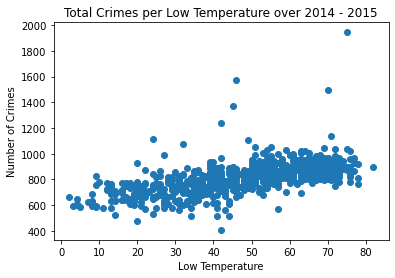

In [42]:
fig, ax = plt.subplots()
plt.scatter(tempdf['TMIN'], tempdf['count_cmplnt'])
plt.xlabel('Low Temperature')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes per Low Temperature over 2014 - 2015');

Here, we look at the amount of snow vs. the crime count. It does not snow very often in New York so it is hard to tell if there is a trend with so few data points, but number of crimes does seem to have a negative linear dependence on the amount of snow that New York recieves. A scatter plot was chosen since we are looking at two numeric variables and a line plot would have been too noisy. 

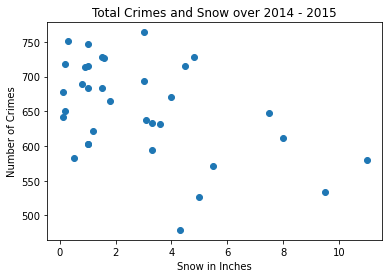

In [43]:
snowdf = tempdf[tempdf['SNOW'] > 0]
fig, ax = plt.subplots()

plt.scatter(snowdf['SNOW'], snowdf['count_cmplnt'])
plt.xlabel('Snow in Inches')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes and Snow over 2014 - 2015');

Here, we look at the amount of daily rain that New York recieved vs. the number of crimes that day. Removing days where there was no rain, there doesn't seem to be a trend here. If there is, there is a slight negative trend. A scatter plot was chosen since we are looking at two numeric variables and a line plot would have been too noisy. 

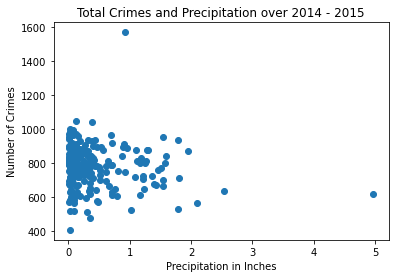

In [44]:
prcpdf = tempdf[tempdf['PRCP'] > 0]
fig, ax = plt.subplots()
plt.scatter(prcpdf['PRCP'], prcpdf['count_cmplnt'])
plt.xlabel('Precipitation in Inches')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes and Precipitation over 2014 - 2015');

Correlation matrix of daily crimes committed vs. the temperature, snow and precipitation. This confirms what we saw in the plots: crimes are highly positively correlated with temperature, slightly negatively correlated with the amount of snow, and very slightly negatively correlated with rain. 

In [45]:
tempdf.corr()

count_cmplnt      TMAX      TMIN      SNOW      PRCP
count_cmplnt      1.000000  0.618311  0.610470 -0.246378 -0.144719
TMAX              0.618311  1.000000  0.966980 -0.237224 -0.026935
TMIN              0.610470  0.966980  1.000000 -0.240683  0.003227
SNOW             -0.246378 -0.237224 -0.240683  1.000000  0.232846
PRCP             -0.144719 -0.026935  0.003227  0.232846  1.000000

Here, we look at the time of day vs. the crime count. The most popular times for crime seem to be Day, Evening and Night, while Early Morning, Late Night and Morning don't seem to be nearly as popular. A bar plot was chosen since we were interested in looking at the total number of crimes across levels of a categorical variable. 

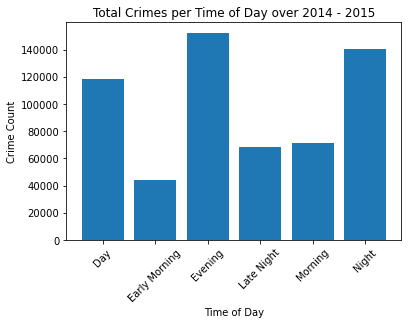

In [46]:
dtdf = df_Crime.groupby('Daytime')['count_cmplnt'].sum().reset_index()
fig, ax = plt.subplots()
plt.bar(dtdf['Daytime'], dtdf['count_cmplnt'])
plt.xlabel('Time of Day')
plt.ylabel('Crime Count')
ax.xaxis.set_tick_params(rotation=45, labelsize=10)
plt.title('Total Crimes per Time of Day over 2014 - 2015');

# New Features

As mentioned previously, our original dataset was somewhat limited as most of the features are categoricals and timestamps with some geospatial data such as longitude and latitude as well as x and y coordinates.  Therefore, we've identified external datasets as well as developed new features from the original dataset attributes to help enhance our data. 

Several new features have been created from the original data set by:
- Cutting the date into Day, Day of Week, Month, Year and Season
- Cutting the time of day and day of week from the Start Date and Start Time
- We've also converted the Day and Month into encoded values for correlation analysis
- Creating a new "GeoCell" feature that groups nearby x and y coordinates together by cutting the x & y grid into 100 equal cells
- Calculating the duration between Start date/time and End date/time
- Calculating the number of complaints per day and per time of day into a feature called "count_complaint"

New external data has been joined with our original data set to give us:
- Per capita income by borough
- Housing pricing by borough
- Weather data by day including precipitation and snow
- Population data by borough
- Holidays
- Events

# Exceptional Work

Using the new Daytime and Day_Name features, we can visualize when crimes are occurring most often throughout the week.  Below, we can see that crimes most often occur in the evening and night and between Tuesday and Friday of the week.

In [47]:
df_datime_wkday = df.groupby(['Day_Name','Daytime']).agg(count_cmplnt=('CMPLNT_NUM','count')).reset_index()

daySort = ["Monday","Tuesday","Wednesday","Thursday", "Friday", "Saturday", "Sunday"]
timeSort = ["Early Morning", "Morning", "Day", "Evening", "Night", "Late Night"]

alt.Chart(df_datime_wkday).mark_rect().encode(
    x = alt.Y('Day_Name:N', sort=daySort),
    y= alt.Y('Daytime:N',sort=timeSort),
    color='count_cmplnt:Q',
  tooltip = ['Day_Name', 'count_cmplnt','Daytime']
).properties(title="Crimes volumes by Time of Day and Day of Week")

alt.Chart(...)

Using the new "GeoCell" feature, we can visualize where on the map we have higher densities of crimes without being constrained by Borough or neighborhood boundaries.  Each x y coordinate maps to a cell.

In [48]:
df_XY_ofns = df.groupby(['GeoCell_X', 'GeoCell_Y']).agg(count_cmplnt=('CMPLNT_NUM','count')).reset_index()

myXSort = ["1","2","3","4","5","6","7","8","9","10"]
myYSort = [10,9,8,7,6,5,4,3,2,1]

alt.Chart(df_XY_ofns).mark_rect().encode(
    x = alt.X('GeoCell_X:O', sort=myXSort),
    y=alt.Y('GeoCell_Y:O', sort=myYSort),
    color='count_cmplnt:Q',
  tooltip = ['GeoCell_X', 'GeoCell_Y','count_cmplnt']
).properties(title="Crimes volumes by GeoCell")

alt.Chart(...)

Dividing up the original 68 different types of crime offenses into 4 distinct buckets allows several avenues to explore classification-based modeling for identifying types of crimes being committed in certain geocells/boroughs.

The below code allocates the various types of crimes into the 4 distinct buckets: Personal, Property, Statutory, and Other

In [49]:
#Replace all Hyphons and forward slashes with spaces
def string_replace(column):
    
    newstrings = []
    
    for string in column:
        for word in string:
            if word == '-':
                newstrings.append(string.replace('-', ' '))
                break
            elif word == '/':
                newstrings.append(string.replace('/', ' '))
                break
        else:
            newstrings.append(string)
                
    
    return ''.join(newstrings)

#Create function to apply new bin labels for crimes types
def crime_apply(string):
    
    for word in string.split():
        if word in personal_list:
            return "Personal Crime"
        elif word in property_list:
            return "Property Crime"
        elif word in statutory_list:
            return "Statutory Crime"
    else:
        return "Other"
    
#Create categorical list of all 68 possible offenses
#4 types of crime: Personal, Property, Statutory/State, and Other
#Each bucket was derived using intel from https://www.justia.com/criminal/offenses/

#Personal - Assault, Battery, Abuse, Kidnapping, Rape, Homicide, Harrassment
personal_list = ['ASSAULT', 'BATTERY', 'MURDER', 'MANSLAUGHTER', 'HARRASSMENT', 'KIDNAPPING', 'RAPE', 'SEX', 'HOMICIDE', 'WEAPON', 'WEAPONS', 'PERSON']

#Property - Arson, Theft, Mischief, Burglary, Larceny, Robbery, Forgery, Embezzlement, Shoplifting, Trespass, Fraud/Financial
property_list = ['ARSON', 'THEFT', 'THEF', 'MISCHIEF', 'ROBBERY', 'BURGLARY', 'JOSTLING', 'TOOLS', 'FRAUD', 'FRAUDS', 'FRAUDULENT', 'LARCENY', 'FORGERY', 'STOLEN', 'UNAUTHORIZED', 'TRESPASS']

#Statutory - State-Related offenses, DUI, DWI, Gambling, Loitering, Drug, Traffic, Public Servant/Admin-related crimes
statutory_list = ['DRUGS', 'DRUG', 'SENSBLTY', 'PENAL', 'PUBLIC', 'INTOXICATED', 'TRAFFIC', 'ADMINISTRATIVE', 'GAMBLING', 'PROSTITUTION', 'ALCOHOLIC', 'DISORDERLY']

#Other - everything else

The below code ouputs the count of crimes in the dataset by the 4 new buckets of crime types.  Property crime has the largest share of observations with 525,885 crimes and the least volume of crimes being that of "Other".

In [61]:
#Display Crime Counts with the new feature

df1 =df_old[df_old['OFNS_DESC'].notna()]

df1['OFNS_DESC'] = df1.apply(lambda x: string_replace(x['OFNS_DESC']), axis = 1)
df1['OFNS_DESC_TYPE'] = df1.apply(lambda x: crime_apply(x['OFNS_DESC']), axis = 1)
df1['OFNS_DESC_TYPE'].value_counts()

Property Crime     525885
Personal Crime     333129
Statutory Crime    185102
Other                1579
Name: OFNS_DESC_TYPE, dtype: int64